In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
print(tf.__version__)

2.7.0


In [2]:
import warnings
warnings.filterwarnings(action='ignore')


In [3]:
df = pd.read_csv('기계마모.csv')

In [4]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [5]:
a= set(df['Type'].values)
value= list(a)
value
encoder1=LabelEncoder()
encoder1.fit(value) 
df['Type']=encoder1.transform(df['Type'])
df['Type'] = df['Type'].astype('category')

In [6]:
df.drop(columns=["UDI", "Product ID", "Type","Torque [Nm]"], inplace=True)

In [7]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,0,0,0,0,0,0,0
1,298.2,308.7,1408,3,0,0,0,0,0,0
2,298.1,308.5,1498,5,0,0,0,0,0,0
3,298.2,308.6,1433,7,0,0,0,0,0,0
4,298.2,308.7,1408,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,14,0,0,0,0,0,0
9996,298.9,308.4,1632,17,0,0,0,0,0,0
9997,299.0,308.6,1645,22,0,0,0,0,0,0
9998,299.0,308.7,1408,25,0,0,0,0,0,0


#### 전처리

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(df[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Tool wear [min]","TWF","HDF","PWF","OSF","RNF"]])
X_data_scaled

array([[0.30434783, 0.35802469, 0.22293364, ..., 0.        , 0.        ,
        0.        ],
       [0.31521739, 0.37037037, 0.13969732, ..., 0.        , 0.        ,
        0.        ],
       [0.30434783, 0.34567901, 0.19208382, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.40217391, 0.35802469, 0.27764843, ..., 0.        , 0.        ,
        0.        ],
       [0.40217391, 0.37037037, 0.13969732, ..., 0.        , 0.        ,
        0.        ],
       [0.40217391, 0.37037037, 0.19324796, ..., 0.        , 0.        ,
        0.        ]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, df['Machine failure'], 
                                                    test_size=0.1, 
                                                    shuffle=True, 
                                                    random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9000, 9) (9000,)
(1000, 9) (1000,)


### model만들기

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


def build_model(num_input=1):
    model = Sequential()##Layer 쌓을 수 있도록 객체를 생성 
    model.add(Dense(128, activation='relu', input_dim=num_input))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

model = build_model(num_input=9)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [13]:
y_train

6460    0
5252    0
3201    0
5477    0
3009    0
       ..
1293    0
4023    0
7259    0
5200    0
3775    0
Name: Machine failure, Length: 9000, dtype: int64

In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)
history #  epochs: 훈련 데이터셋에 포함된 모든 데이터들이 한 번씩 모델을 통과한 횟수로, 모든 학습 데이터셋을 학습하는 횟수를 의미
# verbose : 자세히 보여줘라

Epoch 1/100
282/282 - 1s - loss: 0.0217 - mae: 0.0606 - 1s/epoch - 4ms/step
Epoch 2/100
282/282 - 1s - loss: 0.0010 - mae: 0.0041 - 509ms/epoch - 2ms/step
Epoch 3/100
282/282 - 1s - loss: 0.0010 - mae: 0.0024 - 502ms/epoch - 2ms/step
Epoch 4/100
282/282 - 1s - loss: 0.0010 - mae: 0.0019 - 537ms/epoch - 2ms/step
Epoch 5/100
282/282 - 1s - loss: 9.9995e-04 - mae: 0.0018 - 541ms/epoch - 2ms/step
Epoch 6/100
282/282 - 1s - loss: 9.9983e-04 - mae: 0.0017 - 530ms/epoch - 2ms/step
Epoch 7/100
282/282 - 1s - loss: 9.9976e-04 - mae: 0.0016 - 573ms/epoch - 2ms/step
Epoch 8/100
282/282 - 1s - loss: 9.9966e-04 - mae: 0.0016 - 538ms/epoch - 2ms/step
Epoch 9/100
282/282 - 1s - loss: 9.9960e-04 - mae: 0.0016 - 552ms/epoch - 2ms/step
Epoch 10/100
282/282 - 1s - loss: 9.9957e-04 - mae: 0.0017 - 525ms/epoch - 2ms/step
Epoch 11/100
282/282 - 1s - loss: 9.9959e-04 - mae: 0.0017 - 531ms/epoch - 2ms/step
Epoch 12/100
282/282 - 0s - loss: 9.9958e-04 - mae: 0.0017 - 443ms/epoch - 2ms/step
Epoch 13/100
282/282

282/282 - 0s - loss: 9.9951e-04 - mae: 0.0015 - 492ms/epoch - 2ms/step
Epoch 100/100
282/282 - 0s - loss: 9.9932e-04 - mae: 0.0016 - 474ms/epoch - 2ms/step


In [15]:
history.history['mae'][:3]

[0.060563769191503525, 0.00408934848383069, 0.0024159469176083803]

In [16]:
history.history['loss'][:3]

[0.021651381626725197, 0.0010311828227713704, 0.0010028152028098702]

In [17]:
eva_test=model.evaluate(X_test, y_test)
eva_test

32/32 [==============================] - 0s 2ms/step - loss: 2.7341e-07 - mae: 4.6145e-04


[2.734107056312496e-07, 0.00046145374653860927]

In [18]:
pred_test = model.predict(X_test)

ValueError: x and y must have same first dimension, but have shapes (5,) and (1000,)

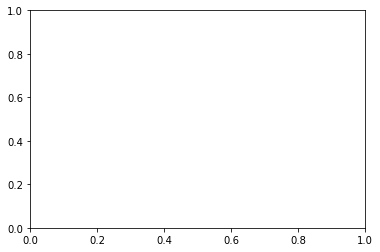

In [19]:
import matplotlib.pyplot as plt
X=[46,47,48,49,50]
plt.plot(X, y_test,marker = 'o',label='realY')

plt.plot(X, pred_test,marker = 'o',label='predict')

plt.legend()

plt.show()

In [ ]:
pred_test[:5]

In [ ]:
y_test[:5]

In [ ]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, pred_test, multioutput='variance_weighted')
R2

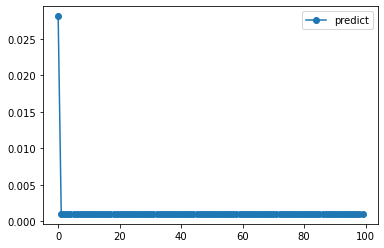

In [23]:
X=[0,1,2]

plt.plot(history.history['loss'],marker = 'o',label='predict')

plt.legend()

plt.show()

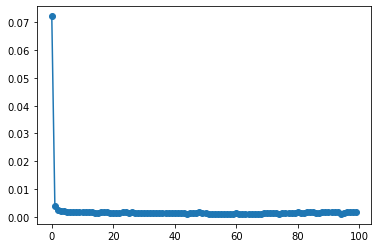

In [24]:
plt.plot(history.history['mae'],marker = 'o',label='predict')